In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [142]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [143]:

dataset = pd.read_csv("customer_churn_data.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [144]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [145]:
dataset.describe()
#this says that on a average a customer stays for 32 months and pays 64$ per month

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [146]:
dataset.dtypes
#numeric or categorical

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [147]:
dataset.columns.to_series().groupby(dataset.dtypes).groups
#grouping datatype wise

{dtype('int64'): Index(['SeniorCitizen', 'tenure'], dtype='object'),
 dtype('float64'): Index(['MonthlyCharges'], dtype='object'),
 dtype('O'): Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object')}

In [148]:
dataset.info()
#no null values
#21 columns
#7043 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [149]:
#checking null values
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [150]:
#Unique values in each categorical variable:
print(dataset["PaymentMethod"].nunique())
print(dataset["PaymentMethod"].unique())

4
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [151]:
#Unique values in each categorical variable:
print(dataset["Contract"].nunique())
print(dataset["Contract"].unique())

3
['Month-to-month' 'One year' 'Two year']


In [152]:
#Check target variable distribution
dataset["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [153]:
dataset['TotalCharges'][6754]

' '

In [154]:
#cleaning the data #totalcharges from object to float
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')
dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")
dataset.info()
#19  TotalCharges      7032 non-null   float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [155]:
#check our previous process created any null values
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [156]:
df = dataset 
is_NaN = df. isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753    

In [157]:
#removed the null values
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

In [158]:
dataset.isna().any()
#check for null

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [159]:
list(dataset['SeniorCitizen'].unique())

[0, 1]

In [160]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 

le_count = 0
for col in dataset.columns[1:]:
    
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())):
            print(col)
            print(list(dataset[col].unique()))
            print(dataset[col])
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            print(dataset[col])              
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

gender
['Female', 'Male']
0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object
0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int32
Partner
['Yes', 'No']
0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object
0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7043, dtype: int32
Dependents
['No', 'Yes']
0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
7038

Text(0.5, 1.0, 'Correlation between each variable and Churn Rate \n')

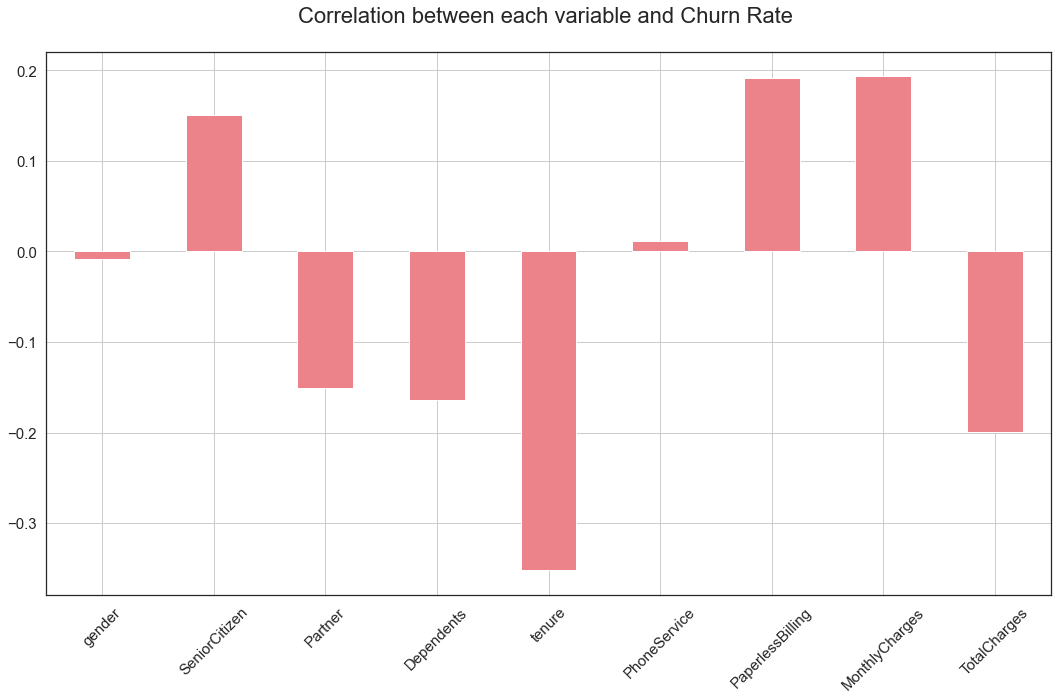

In [161]:
dataset2 = dataset[['gender', 
'SeniorCitizen', 'Partner','Dependents',
'tenure', 'PhoneService', 'PaperlessBilling',
'MonthlyCharges', 'TotalCharges']]
correlations = dataset2.corrwith(dataset.Churn)
#correlation between same variables are removed
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation between each variable and Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

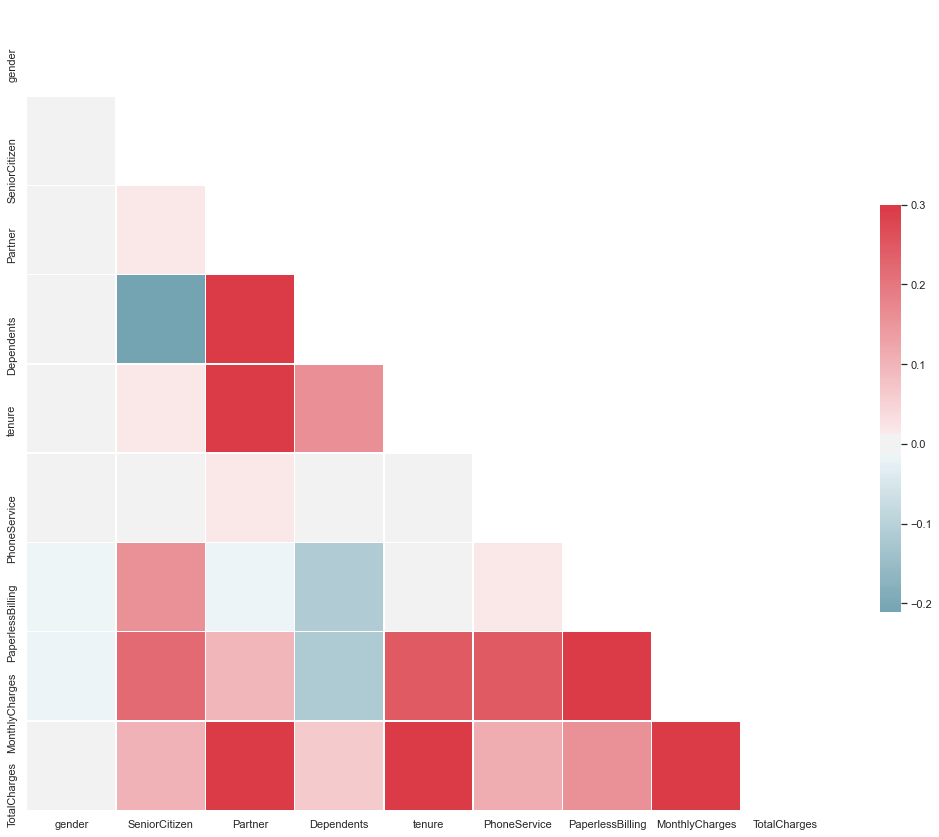

In [162]:
#Set and compute the Correlation Matrix:
sn.set(style="white")
corr = dataset2.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [163]:
#Check Multicollinearity using Variable Inflation Factors (VIF)
# strength of the correlation of a variable with a group of other
# exceeding 10 indicates high multicollinearity
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)
dataset2 = dataset[['gender', 
'SeniorCitizen', 'Partner', 'Dependents',
'tenure', 'PhoneService',
'PaperlessBilling','MonthlyCharges',
'TotalCharges']]
calc_vif(dataset2)
#we can see that monthly charges and totalcharges have high multicollinearity with others

,variables,VIF
0,gender,1.921286
1,SeniorCitizen,1.327766
2,Partner,2.815272
3,Dependents,1.921208
4,tenure,10.549667
5,PhoneService,7.976386
6,PaperlessBilling,2.814160
7,MonthlyCharges,13.988649
8,TotalCharges,12.570269


In [164]:
#'Total Charges' seem to be collinear with 'Monthly Charges (from above matrix) so we can drop any one'.
#Dropping 'TotalCharges':
    
dataset2 = dataset2.drop(columns = "TotalCharges")
#Revalidate Colinearity:
dataset2 = dataset[['gender', 
'SeniorCitizen', 'Partner', 'Dependents',
'tenure', 'PhoneService', 'PaperlessBilling',
'MonthlyCharges']]
calc_vif(dataset2)
#here you can see VIF value of monthly charge got reduced
    


,variables,VIF
0,gender,1.879536
1,SeniorCitizen,1.323089
2,Partner,2.814574
3,Dependents,1.908533
4,tenure,3.287603
5,PhoneService,5.963240
6,PaperlessBilling,2.745897
7,MonthlyCharges,7.453993


In [165]:
#Applying changes in the main dataset:
dataset = dataset.drop(columns = "TotalCharges")

In [166]:
#customerID as identity:
identity = dataset["customerID"]
dataset = dataset.drop(columns="customerID")
# variable that has more than two unique values have been dealt with Label Encoding and one-hot Encoding using get_dummies method in pandas
#dataset= pd.get_dummies(dataset)
#Rejoin userid to dataset:
dataset = pd.concat([dataset, identity], axis = 1)

In [167]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,customerID
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0,7590-VHVEG
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0,5575-GNVDE
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1,3668-QPYBK
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0,7795-CFOCW
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1,9237-HQITU


In [168]:
#Identify response variable:
    
response = dataset["Churn"]
dataset = dataset.drop(columns="Churn")

In [169]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2)
 #use 0.9 if data is huge.random_state = 0
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 19)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 19)
Number transactions y_test dataset:  (1409,)


In [170]:
#Remove Identifiers since that can affect model
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])
test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [171]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
4233,0,0,1,0,33,0,1,0,2,0,2,2,2,2,2,0,0,59.55
3288,0,0,1,1,13,1,0,2,1,1,1,1,1,1,2,0,3,20.85
2045,0,0,0,0,69,1,2,1,0,2,2,2,2,2,2,1,0,110.50
1207,0,0,0,1,9,1,0,0,0,0,0,2,2,2,0,1,1,69.40
3461,0,0,1,1,55,1,0,0,2,2,0,0,0,0,0,0,2,55.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,1,0,0,0,14,1,2,0,0,2,0,0,0,0,0,1,1,55.50
5042,1,0,1,1,19,1,0,2,1,1,1,1,1,1,1,0,3,19.80
3328,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.25
5101,1,0,0,0,17,1,2,1,2,2,2,2,2,0,0,1,0,106.65


In [172]:
y_train

4233    0
3288    0
2045    0
1207    0
3461    0
       ..
5793    0
5042    0
3328    0
5101    0
2704    0
Name: Churn, Length: 5634, dtype: int32

In [173]:
# normalize the variables before conducting any machine learning (classification) algorithms 
#so that all the training and test variables are scaled within a range of 0 to 1
# sc_X = StandardScaler()
# X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
# X_train2.columns = X_train.columns.values
# X_train2.index = X_train.index.values
# X_train = X_train2
# X_test2 = pd.DataFrame(sc_X.transform(X_test))
# X_test2.columns = X_test.columns.values
# X_test2.index = X_test.index.values
# X_test = X_test2

In [174]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
4233,0,0,1,0,33,0,1,0,2,0,2,2,2,2,2,0,0,59.55
3288,0,0,1,1,13,1,0,2,1,1,1,1,1,1,2,0,3,20.85
2045,0,0,0,0,69,1,2,1,0,2,2,2,2,2,2,1,0,110.50
1207,0,0,0,1,9,1,0,0,0,0,0,2,2,2,0,1,1,69.40
3461,0,0,1,1,55,1,0,0,2,2,0,0,0,0,0,0,2,55.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,1,0,0,0,14,1,2,0,0,2,0,0,0,0,0,1,1,55.50
5042,1,0,1,1,19,1,0,2,1,1,1,1,1,1,1,0,3,19.80
3328,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.25
5101,1,0,0,0,17,1,2,1,2,2,2,2,2,0,0,1,0,106.65


In [175]:
#should not use accuracy as metric since this is imbalance data
#so im using mean AUC
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)


In [176]:
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=0)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

C:\drive\anaconda\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\drive\anaconda\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\drive\anaconda\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\drive\anaconda\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an er

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.38,1.24,74.69,1.32
1,SVC,83.99,1.25,79.59,1.95
4,Gaussian NB,82.79,1.29,75.77,1.39
6,Random Forest,82.15,1.33,78.24,1.23
2,Kernel SVM,79.71,1.87,78.74,1.69
3,KNN,78.74,1.58,76.45,1.91
5,Decision Tree Classifier,65.28,1.70,72.52,1.95


[array([0.7535461 , 0.7358156 , 0.73758865, 0.7251773 , 0.75843694,
       0.77442274, 0.74955595, 0.73712256, 0.74600355, 0.75133215]), array([0.82978723, 0.80496454, 0.78014184, 0.76595745, 0.77797513,
       0.79573712, 0.80284192, 0.78330373, 0.79218472, 0.8259325 ]), array([0.82269504, 0.78368794, 0.7712766 , 0.7748227 , 0.78507993,
       0.77442274, 0.79218472, 0.76554174, 0.79573712, 0.80817052]), array([0.77659574, 0.76241135, 0.75177305, 0.77659574, 0.73357016,
       0.74245115, 0.79396092, 0.74600355, 0.78330373, 0.77797513]), array([0.76241135, 0.7748227 , 0.7251773 , 0.7464539 , 0.75666075,
       0.75666075, 0.76909414, 0.75666075, 0.75488455, 0.77442274]), array([0.75886525, 0.70567376, 0.70744681, 0.71808511, 0.74777975,
       0.72824156, 0.73357016, 0.69804618, 0.71047957, 0.74422735]), array([0.78900709, 0.78723404, 0.78014184, 0.7606383 , 0.76198934,
       0.79040853, 0.78685613, 0.77442274, 0.79751332, 0.79573712])]


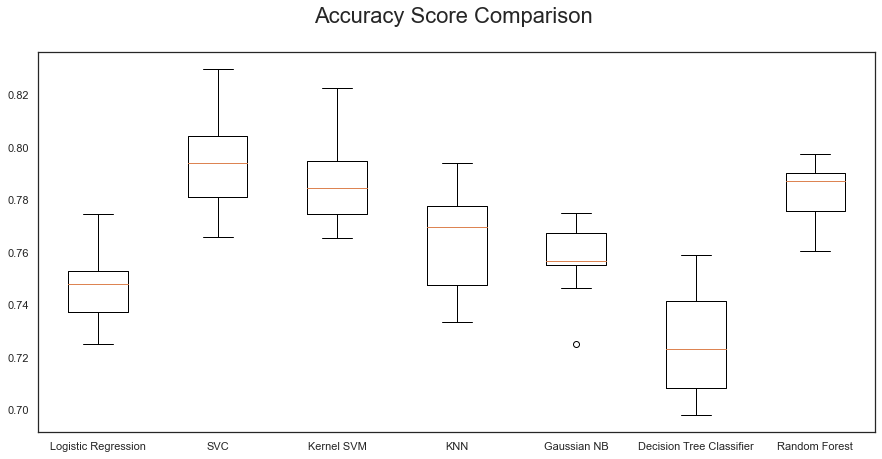

In [177]:
print(acc_results)

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

[array([0.85634119, 0.84014116, 0.83438643, 0.81308962, 0.83916868,
       0.85698195, 0.85074103, 0.84557126, 0.84934368, 0.85212262]), array([0.85199214, 0.84157831, 0.83349907, 0.80680593, 0.83652946,
       0.84891719, 0.85192867, 0.83902897, 0.84597918, 0.84237505]), array([0.82956299, 0.75760092, 0.77776418, 0.79474394, 0.81644875,
       0.79325984, 0.80770131, 0.80040639, 0.79769955, 0.79597324]), array([0.7998562 , 0.7740403 , 0.79039365, 0.77628032, 0.77227603,
       0.7573514 , 0.80847078, 0.80264616, 0.80156954, 0.79089778]), array([0.84727483, 0.82166582, 0.80880621, 0.80449798, 0.82327684,
       0.82948368, 0.83685725, 0.83996798, 0.82972023, 0.8376021 ]), array([0.66657898, 0.64571889, 0.64495969, 0.64754043, 0.68013721,
       0.65819391, 0.65145027, 0.63106124, 0.62545578, 0.67641424]), array([0.82005822, 0.80718255, 0.81966862, 0.80354616, 0.80798224,
       0.84811372, 0.82815061, 0.83812844, 0.82396082, 0.8179641 ])]


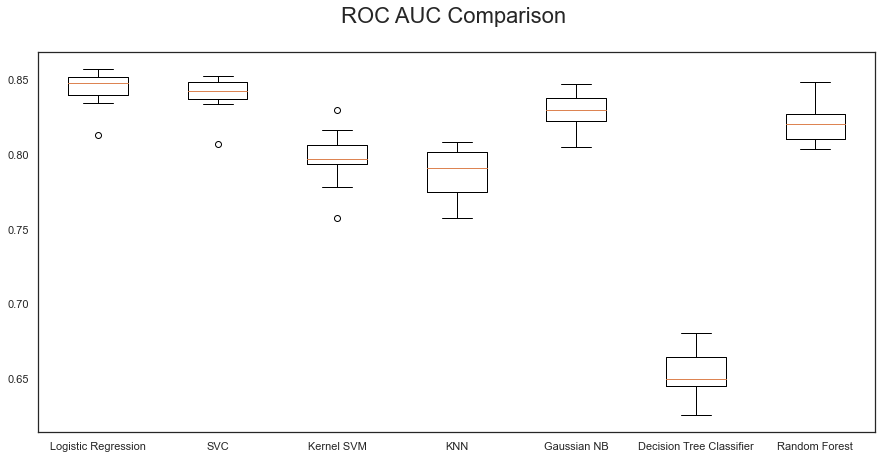

In [178]:
print(auc_results)
#second iterration
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

1 0.7274662881476224
2 0.7636621717530163
3 0.7579843860894251
4 0.7700496806245565
5 0.765791341376863
6 0.7799858055358411
7 0.7792760823278921
8 0.7842441447835344
9 0.772888573456352
10 0.78708303761533
11 0.7778566359119943
12 0.7927608232789212
13 0.7892122072391767
14 0.7920511000709723
15 0.7856635911994322
16 0.7955997161107168
17 0.7877927608232789
18 0.7991483321504613
19 0.7892122072391767
20 0.7963094393186657
21 0.7927608232789212
22 0.7955997161107168
23 0.7955997161107168
24 0.7977288857345636
25 0.794180269694819
26 0.7955997161107168
27 0.7934705464868701
28 0.7963094393186657
29 0.794889992902768
30 0.7977288857345636
31 0.7920511000709723
32 0.7977288857345636
33 0.7955997161107168
34 0.794180269694819
35 0.7991483321504613
36 0.7963094393186657
37 0.7970191625266146
38 0.7998580553584103
39 0.7963094393186657
40 0.7991483321504613
41 0.7970191625266146
42 0.7998580553584103
43 0.794180269694819
44 0.7963094393186657
45 0.794180269694819
46 0.794889992902768
47 0.79

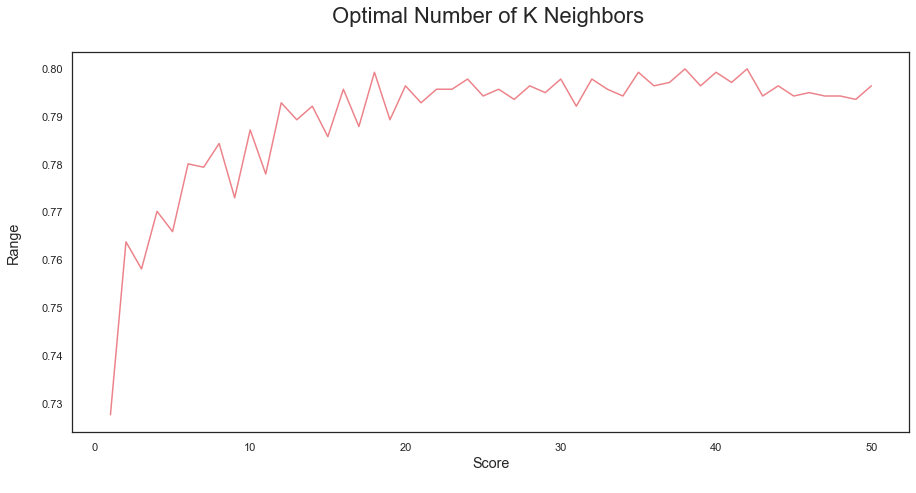

In [179]:
#   Get the right parameters for the baseline models
#Identify the optimal number of K neighbors for KNN Model
#first iteration(previously) we assumed k =3, now we are looping
score_array = []
for each in range(1,51):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
    print(each,knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,51),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()
#23 0.7700496806245565
#from the elbo curve the point at with the curve starts flattening is 22 , but I took 23 since 
#it is a good idea to choose a K value with an odd number to avoid a tie

1 0.7061745919091554
2 0.751596877217885
3 0.7430801987224982
4 0.7665010645848119
5 0.7530163236337828
6 0.7650816181689141
7 0.7643718949609652
8 0.7650816181689141
9 0.7608232789212207
10 0.7636621717530163
11 0.7707594038325053
12 0.772888573456352
13 0.7665010645848119
14 0.7693399574166075
15 0.7693399574166075
16 0.7707594038325053
17 0.7679205110007097
18 0.772888573456352
19 0.772888573456352
20 0.7799858055358411
21 0.7735982966643009
22 0.7750177430801988
23 0.7735982966643009
24 0.7743080198722498
25 0.7743080198722498
26 0.7806955287437899
27 0.7743080198722498
28 0.7778566359119943
29 0.7778566359119943
30 0.7806955287437899
31 0.7792760823278921
32 0.7806955287437899
33 0.7806955287437899
34 0.7814052519517388
35 0.7814052519517388
36 0.7828246983676366
37 0.7828246983676366
38 0.7849538679914834
39 0.7842441447835344
40 0.7877927608232789
41 0.7842441447835344
42 0.7856635911994322
43 0.7877927608232789
44 0.7863733144073811
45 0.7828246983676366
46 0.78708303761533
47 

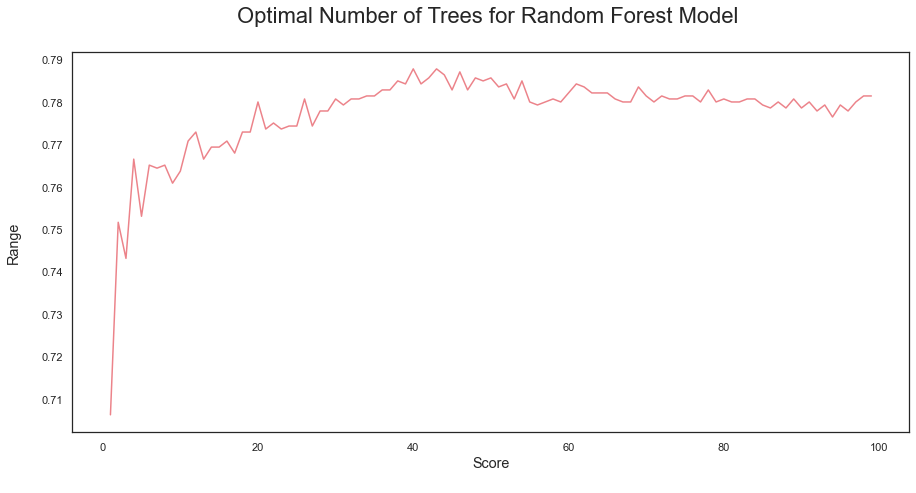

In [180]:
#Identify the optimal number of trees for Random Forest Model
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
    print(each,rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()
#As we could see from the iterations above, the random forest model would attain the highest accuracy score when its n_estimators = 65

In [181]:
#false negatives are more costly than false positives in a churn 
#hence let’s use precision, recall and F2 scores as the ideal metric for the model selection

In [182]:
#Logistic Regression
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.816891        0.7  0.542781  0.611446  0.568309


C:\drive\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:
import pickle

pickle.dump(classifier, open('logistic.pkl', 'wb'))

In [184]:
#Support Vector Machine (linear classifier)
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.816891   0.700000  0.542781  0.611446  0.568309
1         SVM (Linear)  0.807665   0.679443  0.521390  0.590015  0.546831


In [185]:
pickle.dump(classifier, open('svm.pkl', 'wb'))

In [186]:
#KNN
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 23, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.816891   0.700000  0.542781  0.611446  0.568309
1          SVM (Linear)  0.807665   0.679443  0.521390  0.590015  0.546831
2  K-Nearest Neighbours  0.795600   0.661654  0.470588  0.550000  0.499432


In [187]:
pickle.dump(classifier, open('knn.pkl', 'wb'))

In [188]:
# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Kernel SVM', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
3            Kernel SVM  0.795600   0.717172  0.379679  0.496503  0.419126
0   Logistic Regression  0.816891   0.700000  0.542781  0.611446  0.568309
1          SVM (Linear)  0.807665   0.679443  0.521390  0.590015  0.546831
2  K-Nearest Neighbours  0.795600   0.661654  0.470588  0.550000  0.499432


In [189]:
pickle.dump(classifier, open('kernal svm.pkl', 'wb'))

In [190]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0            Kernel SVM  0.795600   0.717172  0.379679  0.496503  0.419126
1   Logistic Regression  0.816891   0.700000  0.542781  0.611446  0.568309
2          SVM (Linear)  0.807665   0.679443  0.521390  0.590015  0.546831
3  K-Nearest Neighbours  0.795600   0.661654  0.470588  0.550000  0.499432
4            Naive Byes  0.755145   0.528713  0.713904  0.607509  0.667166


In [191]:
pickle.dump(classifier, open('gaussian.pkl', 'wb'))

In [192]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)


                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0            Kernel SVM  0.795600   0.717172  0.379679  0.496503  0.419126
1   Logistic Regression  0.816891   0.700000  0.542781  0.611446  0.568309
2          SVM (Linear)  0.807665   0.679443  0.521390  0.590015  0.546831
3  K-Nearest Neighbours  0.795600   0.661654  0.470588  0.550000  0.499432
4            Naive Byes  0.755145   0.528713  0.713904  0.607509  0.667166
5         Decision Tree  0.738822   0.508152  0.500000  0.504043  0.501609


In [193]:
pickle.dump(classifier, open('decision_tree.pkl', 'wb'))

In [194]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 65, 
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
 
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0            Kernel SVM  0.795600   0.717172  0.379679  0.496503  0.419126
1   Logistic Regression  0.816891   0.700000  0.542781  0.611446  0.568309
2          SVM (Linear)  0.807665   0.679443  0.521390  0.590015  0.546831
3  K-Nearest Neighbours  0.795600   0.661654  0.470588  0.550000  0.499432
6         Random Forest  0.781405   0.621324  0.451872  0.523220  0.477941
4            Naive Byes  0.755145   0.528713  0.713904  0.607509  0.667166
5         Decision Tree  0.738822   0.508152  0.500000  0.504043  0.501609


In [195]:
pickle.dump(classifier, open('random_forest.pkl', 'wb'))

In [196]:
#logistic regression is an optimal model of choice for the given dataset
#highest combination of precision, recall and F2 scores
#use Logistic Regression and evaluate its performance

In [197]:
# Model Evaluation
classifier = LogisticRegression(random_state = 0,
penalty = 'l2')
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.816891        0.7  0.542781  0.611446  0.568309


C:\drive\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
#for Model Evaluation ‘K- fold Cross-Validation’ technique that primarily helps us to fix the variance
#default 10 fold cross validation
accuracies = cross_val_score(estimator = classifier,
 X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), 
accuracies.std() * 2))
#an accuracy anywhere between 78% to 82% while running this model on any test set

Logistic Regression Classifier Accuracy: 0.80 (+/- 0.02)


Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

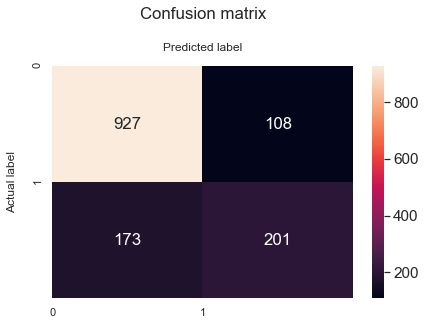

In [106]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

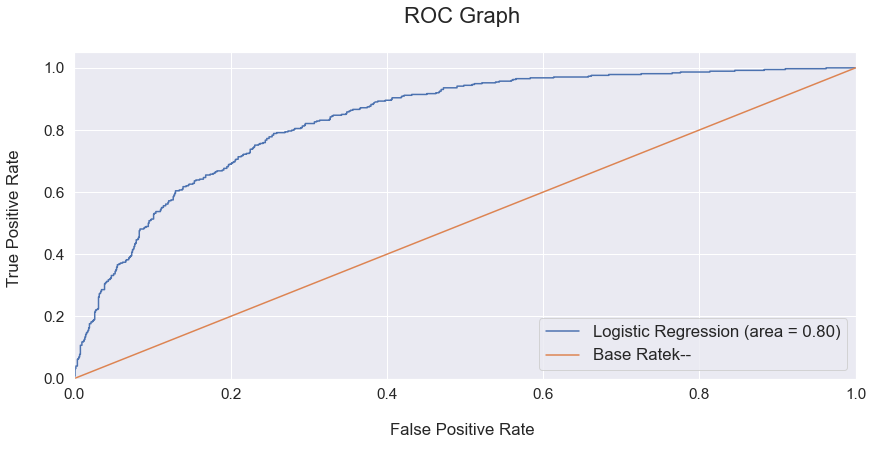

In [107]:
#re-evaluate the model using ROC Graph.
#ROC Graph shows us the capability of a model to distinguish between the classes based on the AUC Mean score
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [108]:
# Analyzing Coefficients
#Predict Feature Importance
feature_importances = pd.concat([
pd.DataFrame(dataset.drop(columns = 'customerID').
columns, columns = ["features"]),
pd.DataFrame(np.transpose(classifier.coef_), 
columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
17,MonthlyCharges,0.857996
15,PaperlessBilling,0.221671
7,InternetService,0.169208
16,PaymentMethod,0.087847
1,SeniorCitizen,0.081854
6,MultipleLines,0.064417
13,StreamingMovies,0.020635
0,gender,0.007844
2,Partner,-0.000732
12,StreamingTV,-0.009860


In [109]:
#Model Improvement
# Round 1:
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
print(lr_classifier)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)
Took 3.03 seconds


(0.7228651936280588, {'C': 10, 'penalty': 'l2'})

In [110]:
# Round 2:
# Select Regularization Method
import time
penalty = ['l2']
# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 0.31 seconds


(0.720339272653136, {'C': 0.05, 'penalty': 'l2'})

In [111]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(X_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

[[927 108]
 [173 201]]
Test Data Accuracy: 0.8006


<Figure size 2016x1440 with 0 Axes>

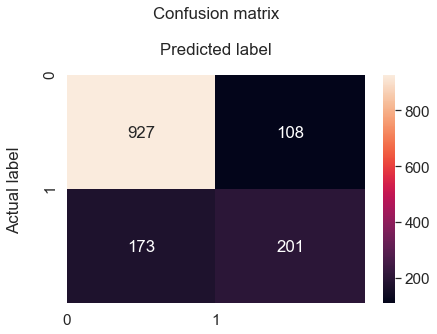

In [112]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),
rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [113]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

      customerID  Churn  predictions  propensity_to_churn(%) Ranking
6701  0516-OOHAR      0            0                   23.04       5
6902  5820-PTRYM      0            0                    3.59       8
3123  6692-YQHXC      0            1                   53.94       2
821   5318-YKDPV      0            0                    3.00       9
3610  2612-RANWT      1            1                   73.46       1
...          ...    ...          ...                     ...     ...
5535  2404-JIBFC      0            0                    2.48       9
5543  6646-JPPHA      0            0                   39.50       3
3930  8849-PRIQJ      0            0                    9.13       7
1002  8120-JDCAM      0            1                   63.25       2
337   2088-IEBAU      0            0                    1.91       9

[1409 rows x 5 columns]


In [114]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
6701,0.995042,-0.437173,1.040581,1.538048,-0.175958,0.326587,-0.986817,0.175277,-0.918277,1.242243,1.243613,-0.925990,1.145596,1.148049,0.369639,-1.217798,-1.470320,1.185819
6902,-1.004982,2.287422,1.040581,-0.650175,0.966854,0.326587,1.121936,-1.181194,1.405879,1.242243,1.243613,1.392689,-1.112727,-1.110369,0.369639,0.821154,-0.532816,0.122403
3123,0.995042,-0.437173,-0.961001,-0.650175,-0.665735,0.326587,-0.986817,0.175277,-0.918277,-1.028619,-1.027543,-0.925990,-1.112727,-1.110369,-0.829293,0.821154,-0.532816,0.172407
821,0.995042,-0.437173,1.040581,1.538048,0.436263,0.326587,-0.986817,-1.181194,1.405879,-1.028619,1.243613,1.392689,1.145596,1.148049,1.568571,0.821154,-0.532816,0.479097
3610,-1.004982,-0.437173,-0.961001,-0.650175,-0.828994,0.326587,1.121936,0.175277,-0.918277,-1.028619,1.243613,-0.925990,1.145596,1.148049,-0.829293,0.821154,-1.470320,1.179152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,-1.004982,-0.437173,1.040581,1.538048,0.926039,0.326587,1.121936,-1.181194,1.405879,-1.028619,1.243613,1.392689,1.145596,1.148049,1.568571,0.821154,-1.470320,0.677446
5543,-1.004982,2.287422,-0.961001,-0.650175,-0.747364,0.326587,-0.986817,0.175277,1.405879,1.242243,-1.027543,-0.925990,-1.112727,-1.110369,-0.829293,-1.217798,0.404687,0.469096
3930,-1.004982,-0.437173,1.040581,1.538048,1.415816,0.326587,1.121936,0.175277,1.405879,-1.028619,1.243613,1.392689,1.145596,1.148049,0.369639,0.821154,0.404687,1.487509
1002,0.995042,-0.437173,1.040581,1.538048,-1.155511,0.326587,-0.986817,0.175277,-0.918277,-1.028619,-1.027543,-0.925990,-1.112727,-1.110369,-0.829293,0.821154,1.342191,0.159072


In [115]:
y_test

6701    0
6902    0
3123    0
821     0
3610    1
       ..
5535    0
5543    0
3930    0
1002    0
337     0
Name: Churn, Length: 1409, dtype: int32

In [116]:
import pickle
# open a file, where you ant to store the data
#file = open('logistic_churn1.pkl', 'wb')
pickle.dump(lr_classifier, open('logistic_churn.pkl', 'wb'))
# dump information to that file



In [119]:
data = [-0.998227
-0.440625,
1.041692,
1.532835,
-0.745692,
0.326254,
-1.210193,
0.521902,
-0.962027,
-0.326254,
1.167585,
1.382072,
-0.888655,
-0.52353,
1.010707,
-0.52353,
-0.639416,
-0.886099,
-0.52353
]
model = pickle.load(open('logistic_churn.pkl', 'rb'))
prediction=model.predict([data])
print(prediction)

[0]


EOFError: Ran out of input

In [199]:
max(set([0,0,0,0,0,0,1]))

1

In [201]:
import statistics
from statistics import mode

mode([1,1,1,0,0,1])

1